In [ ]:
# https://scikit-learn.org/stable/

In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Height_Weight_Data.csv') # for excel pd.read_excel('file.xlsx')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [5]:
df.Height.mean()

69.02441087268797

In [6]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [7]:
df.Height.std()

2.8585833281420983

In [8]:
df.shape

(3501, 2)

In [9]:
row, col = df.shape

In [10]:
row

3501

In [11]:
col

2

In [12]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Vizualisation

Text(0.5, 1.0, 'Weight plot')

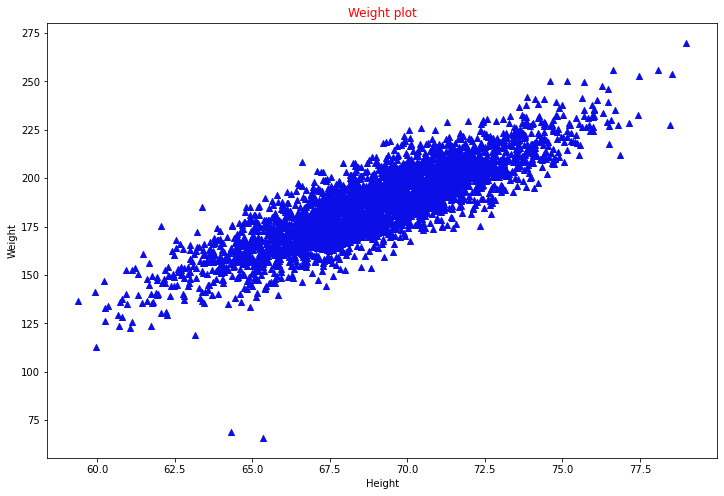

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height , df.Weight, marker='^' , color='#0B0EE6') # https://htmlcolorcodes.com/
plt.xlabel('Height', color='black')
plt.ylabel('Weight')
plt.title('Weight plot', color='red')

In [14]:
x = df['Height'] # single dim not allowed
y = ['Weight']

In [15]:
x.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [16]:
x = df[['Height']] # x = df.drop('area', axis=1) ; x = df.drop(columns=['area'])
y = df['Weight']

In [17]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


# Split the dataste into train and test

In [18]:
from sklearn.model_selection import train_test_split as tts

In [19]:
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [20]:
xtrain.head()

,Height
1577,60.798886
2930,72.363354
762,65.665959
328,65.930896
2452,74.340861


In [21]:
ytrain.head()

1577    128.390221
2930    216.056503
762     164.215639
328     163.008432
2452    210.111536
Name: Weight, dtype: float64

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression()

In [24]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

In [25]:
m = reg.coef_
m

array([5.93270096])

In [26]:
c = reg.intercept_
c 

-222.58654827186538

In [27]:
x1 = 2100
y = m * x1 + c

In [28]:
y

array([12236.08546515])

In [29]:

reg.predict([[2100]])

/Users/rakibuddin/opt/anaconda3/envs/Deep/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([12236.08546515])

In [30]:
pred = reg.predict(xtest)

In [31]:
pred

array([176.59958607, 180.97578954, 189.79461953, ..., 177.29646118,
       170.95490695, 224.39254019])

In [32]:
df['predicted result'] = reg.predict(x)

In [33]:
df.head()

,Height,Weight,predicted result
0,73.847017,241.893563,215.525720
1,68.781904,162.310473,185.475920
2,74.110105,212.740856,217.086545
3,71.730978,220.042470,202.971896
4,69.881796,206.349801,192.001249


In [34]:
x1 = 2000
y = m * x1 + c
y

array([11642.81536927])

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
mse = mean_squared_error(ytest, pred)

In [37]:
mse

113.31582928953168

In [38]:
mae = mean_absolute_error(ytest, pred)

In [39]:
mae

8.332795858043937

# Best fit line

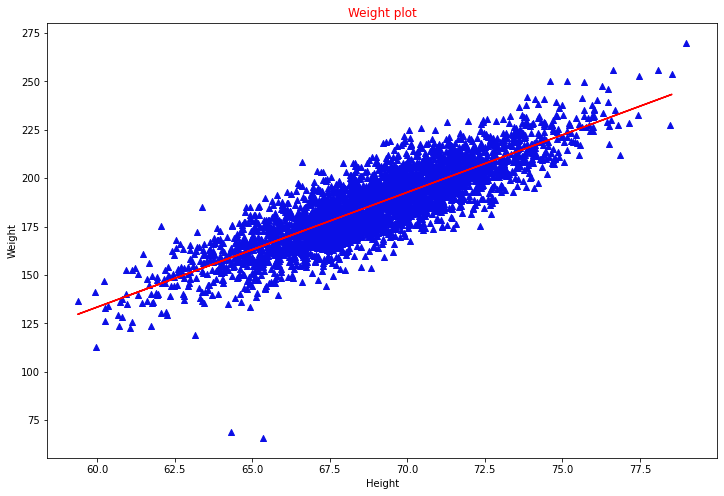

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height , df.Weight, marker='^' , color='#0B0EE6') # https://htmlcolorcodes.com/
plt.xlabel('Height', color='black')
plt.ylabel('Weight')
plt.title('Weight plot', color='red')
plt.plot(xtrain , reg.predict(xtrain), color='red')

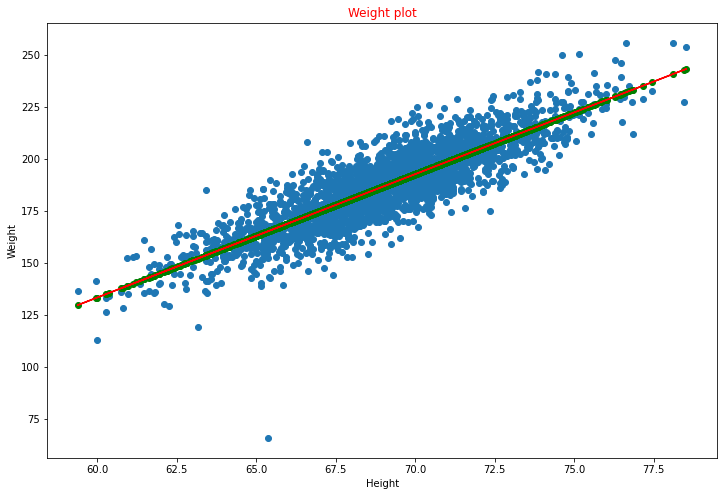

In [43]:
plt.figure(figsize=(12,8))
plt.xlabel('Height', color='black')
plt.ylabel('Weight')
plt.title('Weight plot', color='red')
plt.plot(xtrain , reg.predict(xtrain), color='red')
plt.scatter(xtrain, ytrain)
plt.scatter(xtrain, reg.predict(xtrain), color='green')

In [44]:
import warnings
warnings.filterwarnings('ignore')

reg.predict([[2500]])

array([14609.16584866])

In [45]:
reg.score(xtest, ytest)

0.7259270076519498

In [46]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.7259270076519498